## Importe de bibliotecas

In [2]:
import multiprocessing

from gensim.models import Word2Vec

import pandas as pd

## Carga de datos

In [3]:
resumenes_docentes = pd.read_csv("../Data/ResumenesDocentes.csv", index_col=0)
resumenes_estudiantes = pd.read_csv("../Data/ResumenesEstudiantes.csv", index_col=0)

## Verificacion datos

## Preparación de datos

In [4]:
corpus=[]

for index, row in resumenes_docentes.iterrows():
    if index > 1: break
    corpus.append(row['palabras_corpus'].lower().split())

for index, row in resumenes_estudiantes.iterrows():
    if index > 1: break
    corpus.append(row['palabras_corpus'].lower().split())

del(resumenes_docentes)
del(resumenes_estudiantes)

len(corpus)

2

In [5]:
from gensim import corpora

dictionary = corpora.Dictionary(corpus)
dictionary[100]

'identificar'

In [6]:
#Frecuencia documentos BOW
bow_corpus = [dictionary.doc2bow(text) for text in corpus]

del(corpus)

In [8]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "identificar".lower().split()
print(dictionary.doc2bow(words))
print(tfidf[dictionary.doc2bow(words)])

[(100, 1)]
[]


## Queries de Similitud

In [9]:
from gensim import similarities

index_data = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=5)

In [ ]:
#Realizamos la busqueda de palabras similares
query_document = 'identificar'.split()
query_bow = dictionary.doc2bow(query_document)
similares = index_data[tfidf[query_bow]]

In [ ]:
print(list(enumerate(similares)))

## Bigramas

In [68]:
from gensim.models.phrases import Phrases, Phraser

In [98]:
phrases = Phrases(palabras_corpus, min_count=30, progress_per=10000)

In [99]:
bigram = Phraser(phrases)

In [100]:
sentences = bigram[palabras_corpus]

In [17]:
len(corpus)

451

## Word2vec con docentes

In [19]:
# Fase de creación de modelo


modelo = Word2Vec(min_count=2,
                     window=2,
                     size=10,
                     sample=0, 
                     alpha=0.01, 
                     min_alpha=0.0, 
                     negative=100,
                     workers=8)


modelo

In [20]:
# Fase de construcción de vocabulario

vocabulario = modelo.build_vocab([lemas_corpus_docentes_spliteados], progress_per=10000)
vocabulario

In [21]:
# Fase de entrenamiento

entrenamiento = modelo.train([lemas_corpus_docentes_spliteados], total_examples=modelo.corpus_count, epochs=10, report_delay=1)
entrenamiento

(100000, 424870)

In [44]:
# para no volver a entrenar
# w2v_model.init_sims(replace=True)

## Word2vec con estudiantes

In [45]:
# Fase de creación de modelo


modelo2 = Word2Vec(min_count=2,
                     window=2,
                     size=10,
                     sample=0, 
                     alpha=0.01, 
                     min_alpha=0.0, 
                     negative=100,
                     workers=8)


modelo2

In [46]:
# Fase de construcción de vocabulario

vocabulario2 = modelo2.build_vocab([lemas_corpus_estudiantes_spliteados], progress_per=10000)
vocabulario2

In [47]:
# Fase de entrenamiento

entrenamiento2 = modelo2.train([lemas_corpus_estudiantes_spliteados], total_examples=modelo2.corpus_count, epochs=10, report_delay=1)
entrenamiento2

(100000, 177360)

In [144]:
# para no volver a entrenar
# w2v_model.init_sims(replace=True)

## Word2vec completo

In [53]:
lemas_corpus_spliteados_completo = lemas_corpus_docentes_spliteados+lemas_corpus_estudiantes_spliteados

In [55]:
len(lemas_corpus_spliteados_completo)

60223

In [60]:
palabras_corpus[1]

'impacto'

In [75]:
modelo3 = Word2Vec(min_count=2,
                     window=2,
                     size=10,
                     sample=0, 
                     alpha=0.01, 
                     min_alpha=0.0, 
                     negative=100,
                     workers=8)


modelo3

In [119]:
#Modelo Profe
from time import time
cores = multiprocessing.cpu_count() #cuenta el nro de nucles de la pc

w2v_model = Word2Vec(min_count=3,
                     window=10,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores
                )
t = time()
w2v_model.build_vocab(palabras_corpus,progress_per=10000)  # prepare the model vocabulary
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.04 mins


In [120]:
t = time()
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
        

Time to train the model: 0.18 mins


In [121]:
w2v_model.save('w2v_model.model')

In [122]:

# Fase de construcción de vocabulario
vocabulario3 = modelo3.build_vocab([palabras_corpus], progress_per=10000)
vocabulario3

TypeError: unhashable type: 'list'

In [58]:
# Fase de entrenamiento

modelo3.train([palabras_corpus], total_examples=modelo3.corpus_count, epochs=10, report_delay=1)

(100000, 850500)

## Exploración de modelo

In [ ]:
modelo3.wv.

In [141]:
w2v_model.wv.most_similar(positive=[''])

[('espera', 0.9999693632125854),
 ('situación', 0.9999693036079407),
 ('discursos', 0.9999693036079407),
 ('campos', 0.9999685287475586),
 ('organismos', 0.999968409538269),
 ('procedimiento', 0.9999682307243347),
 ('estudiar', 0.9999682307243347),
 ('año', 0.9999676942825317),
 ('permanente', 0.9999674558639526),
 ('méxico', 0.9999673962593079)]

In [63]:
modelo3.wv.similarity('social', "sociedad")

0.9998706

In [65]:
modelo3.wv.similarity('conocimiento', "conocer")co

KeyError: "word 'conocer' not in vocabulary"

In [131]:
modelo3.wv.similarity('agricultura', "motor")

KeyError: "word 'motor' not in vocabulary"

In [66]:
modelo3.wv.doesnt_match(["conocimiento","conocer","social"])

'social'

In [65]:
modelo3.wv.doesnt_match(["motor","sociedad","social"])

'motor'

## Visualizacion

In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [142]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    counter=0
    for word in model.wv.vocab:
        if counter == 100:
            break
        tokens.append(model[word])
        labels.append(word)
        counter= counter+1
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

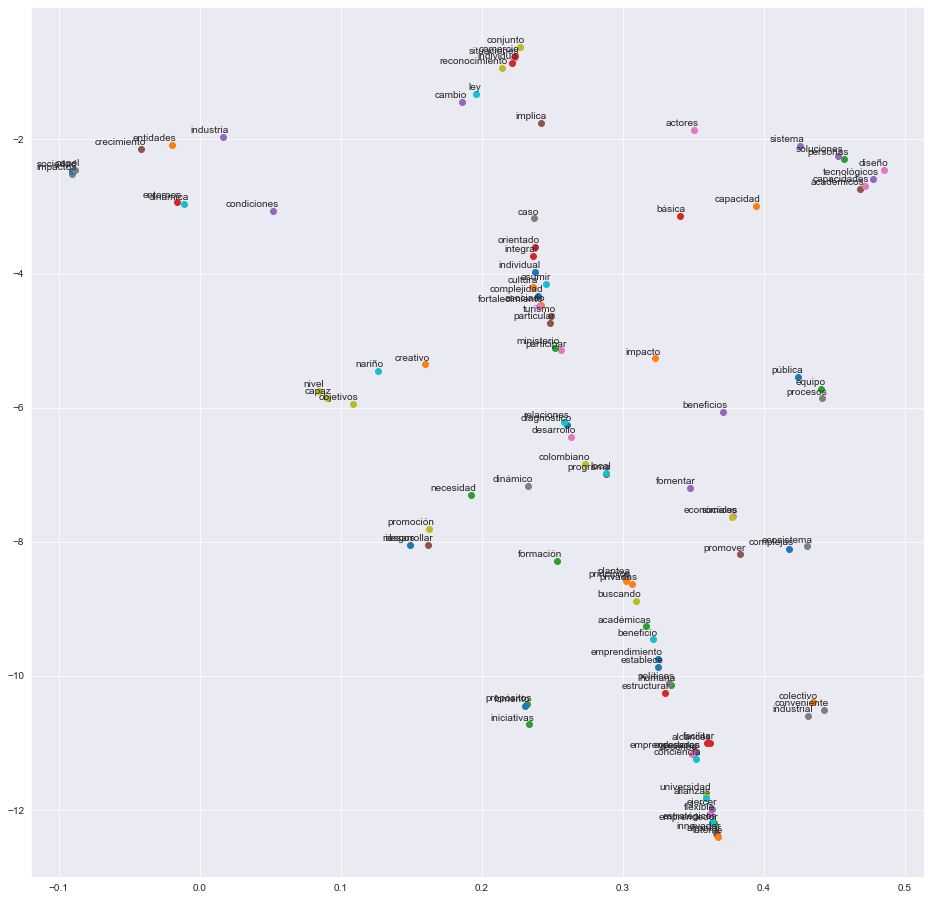

In [144]:
tsne_plot(w2v_model)